<a href="https://colab.research.google.com/github/JuanSol26/Data-Science-3---Solinas-Juan/blob/main/Data_Science_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Falta agrandar las celdas para que se vea todo el texto
# Hacer comentarios sobre lo que estamos haciendo
# Hacer 3 graficos en Sentimientos, en orden de clasificación y en nube de palabras
#Ver el TF-IDF y el BoW que armamos, comparando con las clases para hacer comentarios
#Ver si sumamos la clase 7 a todos estos pasos

# Estructura

In [492]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings ("ignore")

In [493]:
url_1 = "https://github.com/JuanSol26/Data-Science-3---Solinas-Juan/raw/main/Data%20Science%203.xlsx"

reviews = pd.read_excel(url_1)

In [494]:
reviews.head()

,film_name,gender,film_avg_rate,review_rate,review_title,review_text
0,Respira (Serie de TV),"Serie de TV, Drama, Medicina",4.6,1,Respira,"Como fan de las series españolas y de Najwa, e..."
1,Respira (Serie de TV),"Serie de TV, Drama, Medicina",4.6,2,Esta serie te llama tonto a la cara,Todo lo malo que puede tener una serie lo pose...
2,Respira (Serie de TV),"Serie de TV, Drama, Medicina",4.6,1,Respira,"La serie es un drama médico que intenta ""copia..."
3,Respira (Serie de TV),"Serie de TV, Drama, Medicina",4.6,1,"Imposible, no hay manera",Nadie te obliga a ver nada que no quieras ver ...
4,Respira (Serie de TV),"Serie de TV, Drama, Medicina",4.6,1,Serie nefasta,Está serie da vergüenza ajena. Una serie donde...


In [495]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2560 entries, 0 to 2559
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   film_name      2560 non-null   object 
 1   gender         2560 non-null   object 
 2   film_avg_rate  2560 non-null   float64
 3   review_rate    2560 non-null   int64  
 4   review_title   2560 non-null   object 
 5   review_text    2560 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 120.1+ KB


In [496]:
np.sort(reviews.film_name.unique())

array(['60 minutos ', 'A través de tu mirada ',
       'ARA San Juan: El submarino que desapareció (Serie de TV)',
       'Accidente (Serie de TV)', 'Adiós, Tierra (Serie de TV)',
       'Agencia Bien de amores ', 'Al borde del abismo ',
       'Alejandro Magno: La creación de un dios (Serie de TV)',
       'Amor, acoso, asesinato ',
       'Antares de la Luz: La secta del fin del mundo ',
       'Antracita (Serie de TV)',
       'Aquellos maravillosos 90 (Serie de TV)', 'As bestas ',
       'Asesinato para principiantes (Miniserie de TV)', 'Atlas ',
       'Avatar: La leyenda de Aang (Serie de TV)',
       'Baby Bandito (Serie de TV)', 'Baki Hanma vs. Kengan Ashura ',
       'Bandidos (Serie de TV)', 'Belleza salvaje (Serie de TV)',
       'Biónicos ', 'Blood & Water (Serie de TV)', 'Bodkin (Serie de TV)',
       'Break Point (Serie de TV)', 'Buenos días, Verônica (Serie de TV)',
       'Capitanes del mundo (Serie de TV)',
       'Cautivar a un rey (Serie de TV)',
       'Cazadores en

In [497]:
reviews.film_name.value_counts()

,count
film_name,
La sociedad de la nieve,271
As bestas,246
Cobra Kai (Serie de TV),98
Élite (Serie de TV),92
Mi reno de peluche (Miniserie de TV),78
...,...
Seis Naciones: El corazón del rugby (Serie de TV),1
De las cenizas,1
Cautivar a un rey (Serie de TV),1


In [498]:
reviews.gender.value_counts()

,count
gender,
"Drama, Aventuras, Basado en hechos reales, Supervivencia, Naturaleza, Años 70, Zonas frías/polares, Escenario único",271
"Thriller, Drama, Vida rural",246
"Serie de TV, Comedia, Drama, Acción, Artes marciales, Karate, Secuela, Basada en una película",98
"Serie de TV, Drama, Thriller, Crimen, Colegios & Universidad, Adolescencia",92
"Serie de TV, Thriller, Drama, Terror, Basado en hechos reales, Miniserie de TV, Abusos sexuales, Comedia negra",78
...,...
"Serie de TV, Drama, Romance, Drama romántico",1
"Drama, Thriller, Colegios & Universidad",1
"Serie de TV, Comedia, Drama, Romance, Drama romántico, Medicina",1


In [499]:
reviews2 = reviews.gender.str.split(',', expand=True)
reviews2.columns= ["Género 1", "Género 2", "Género 3", "Género 4", "Género 5", "Género 6", "Género 7", "Género 8", "Género 9", "Género 10","Género 11","Género 12", "Género 13"]

In [500]:
reviews2["Pelicula"] = reviews.film_name
reviews2 = reviews2.set_index("Pelicula")

In [501]:
def gen(x):
    if x == "Serie de TV":
      return "None"
    else:
        return x

In [502]:
reviews2["Género 1"]= reviews2["Género 1"].apply(gen)

In [503]:
reviews2["Género 1"] = reviews2["Género 1"].mask(
    reviews2["Género 1"] == "None",
    reviews2["Género 2"]
)

In [504]:
reviews2['Género 1'].unique()

array([' Drama', 'Terror', ' Comedia', ' Animación', 'Drama', 'Comedia',
       ' Thriller', 'Animación', ' Terror', 'Acción', 'Documental',
       ' Romance', ' Documental', ' Fantástico', 'Ciencia ficción',
       ' Intriga', 'Fantástico', 'Thriller', 'Romance', ' Acción',
       ' Ciencia ficción', ' Aventuras', 'Aventuras', 'Intriga'],
      dtype=object)

In [505]:
reviews2["Género 1"] = reviews2["Género 1"]
reviews2 = reviews2.reset_index(drop=True)

reviews["Género 1"] = reviews2["Género 1"]

In [506]:
reviews.drop("gender", axis=1, inplace=True)
reviews.head()

,film_name,film_avg_rate,review_rate,review_title,review_text,Género 1
0,Respira (Serie de TV),4.6,1,Respira,"Como fan de las series españolas y de Najwa, e...",Drama
1,Respira (Serie de TV),4.6,2,Esta serie te llama tonto a la cara,Todo lo malo que puede tener una serie lo pose...,Drama
2,Respira (Serie de TV),4.6,1,Respira,"La serie es un drama médico que intenta ""copia...",Drama
3,Respira (Serie de TV),4.6,1,"Imposible, no hay manera",Nadie te obliga a ver nada que no quieras ver ...,Drama
4,Respira (Serie de TV),4.6,1,Serie nefasta,Está serie da vergüenza ajena. Una serie donde...,Drama


In [507]:
reviews["review_text"] = reviews["review_text"].str.lower()
reviews["Género 1"] = reviews["Género 1"].str.lower()
reviews["Género 1"] = reviews["Género 1"].str.strip()

In [508]:
reviews["Género 1"].unique()

array(['drama', 'terror', 'comedia', 'animación', 'thriller', 'acción',
       'documental', 'romance', 'fantástico', 'ciencia ficción',
       'intriga', 'aventuras'], dtype=object)

# Tokenización y stopwords

In [511]:
!python -m spacy download es_core_news_md
import spacy
from tqdm import tqdm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 MB 17.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [480]:
nlp = spacy.load("es_core_news_md")

nlp.Defaults.stop_words
spacy_stopwords = spacy.lang.es.stop_words.STOP_WORDS

In [564]:
spacy_stopwords.update([".", ",", "!", "¡", ";", "-", "+", "/", "*","(" ")", "[","]", "`", "´", "`", "serie", "película", "si", "?", "¿", "´", "``", "quizá", "film", "bien", "aunque", "tan", "aún", "aun", "que",
    # Artículos
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo', 'al', 'del', "aun", "que"

    # Pronombres
    'yo', 'me', 'mi', 'mí', 'conmigo', 'tú', 'te', 'ti', 'contigo', 'él', 'le', 'lo',
    'ella', 'la', 'ello', 'nosotros', 'nos', 'nosotras', 'vosotros', 'vosotras', 'os',
    'ellos', 'ellas', 'les', 'los', 'las', 'se', 'si', 'consigo',

    # Preposiciones
    'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en',
    'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so',
    'sobre', 'tras',

    # Conjunciones
    'y', 'o', 'pero', 'aunque', 'mas', 'sin embargo', 'porque', 'pues', 'si', 'como',
    'que', 'cuando', 'mientras', 'donde', 'así que', 'ni', 'sino', 'tanto', 'como',

    # Adverbios comunes
    'muy', 'mucho', 'poco', 'bastante', 'demasiado', 'más', 'menos', 'algo', 'casi',
    'solo', 'solamente', 'tan', 'tanto', 'todo', 'nada', 'aquí', 'ahí', 'allí',
    'cerca', 'lejos', 'antes', 'después', 'ahora', 'luego', 'siempre', 'nunca',
    'también', 'tampoco', 'ya', 'todavía', 'aún', "capítulo", "episodio"

    # Verbos comunes (infinitivos)
    'ser', 'estar', 'haber', 'tener', 'hacer', 'poder', 'decir', 'ir', 'ver',
    'dar', 'saber', 'querer', 'llegar', 'dejar', 'seguir', 'poner', 'parecer',

    # Palabras vacías adicionales
    'etc', 'etcétera', 'tal', 'cual', 'cuales', 'cuál', 'cuáles', 'cuyo', 'cuya', "cine", "cosa", "lo"
    'cuyos', 'cuyas', 'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos',
    'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'otro', 'otra', 'otros',
    'otras', 'alguno', 'alguna', 'algunos', 'algunas', 'ninguno', 'ninguna',
    'varios', 'varias', 'muchos', 'muchas', 'pocos', 'pocas', 'cada', "cosa", "película", 'sendos', "nada", "nadie", "aunque", " aunque", "aunque ",
])

In [436]:
import nltk
nltk.download('punkt')  #tokenizer de nltk
nltk.download('punkt_tab')  #tokenizer de nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [666]:
stopwords_es = set(stopwords.words('spanish'))
stopwords_es.update([".", ",", "!", "¡", ";", "-", "+", "/", "*","(" ")", "[","]", "`", "´", "`", "serie", "película", "si", "?", "¿", "´", "``", "quizá", "film", "bien", "aunque", "tan", "aún", "aun", "que",
    # Artículos
    'el', 'la', 'los', 'las', 'un', 'una', 'unos', 'unas', 'lo', 'al', 'del', "aun", "que"

    # Pronombres
    'yo', 'me', 'mi', 'mí', 'conmigo', 'tú', 'te', 'ti', 'contigo', 'él', 'le', 'lo',
    'ella', 'la', 'ello', 'nosotros', 'nos', 'nosotras', 'vosotros', 'vosotras', 'os',
    'ellos', 'ellas', 'les', 'los', 'las', 'se', 'si', 'consigo',

    # Preposiciones
    'a', 'ante', 'bajo', 'cabe', 'con', 'contra', 'de', 'desde', 'durante', 'en',
    'entre', 'hacia', 'hasta', 'mediante', 'para', 'por', 'según', 'sin', 'so',
    'sobre', 'tras',

    # Conjunciones
    'y', 'o', 'pero', 'aunque', 'mas', 'sin embargo', 'porque', 'pues', 'si', 'como',
    'que', 'cuando', 'mientras', 'donde', 'así que', 'ni', 'sino', 'tanto', 'como',

    # Adverbios comunes
    'muy', 'mucho', 'poco', 'bastante', 'demasiado', 'más', 'menos', 'algo', 'casi',
    'solo', 'solamente', 'tan', 'tanto', 'todo', 'nada', 'aquí', 'ahí', 'allí',
    'cerca', 'lejos', 'antes', 'después', 'ahora', 'luego', 'siempre', 'nunca',
    'también', 'tampoco', 'ya', 'todavía', 'aún', "capítulo", "episodio"

    # Verbos comunes (infinitivos)
    'ser', 'estar', 'haber', 'tener', 'hacer', 'poder', 'decir', 'ir', 'ver',
    'dar', 'saber', 'querer', 'llegar', 'dejar', 'seguir', 'poner', 'parecer', "películas",

    # Palabras vacías adicionales
    'etc', 'etcétera', 'tal', 'cual', 'cuales', 'cuál', 'cuáles', 'cuyo', 'cuya', "cine", "cosa", "lo"
    'cuyos', 'cuyas', 'este', 'esta', 'estos', 'estas', 'ese', 'esa', 'esos',
    'esas', 'aquel', 'aquella', 'aquellos', 'aquellas', 'otro', 'otra', 'otros',
    'otras', 'alguno', 'alguna', 'algunos', 'algunas', 'ninguno', 'ninguna',
    'varios', 'varias', 'muchos', 'muchas', 'pocos', 'pocas', 'cada', "cosa", "película", 'sendos', "nada", "nadie", "aunque", " aunque", "aunque ",
])

In [566]:
reviews["Reseñas"] = reviews["review_text"].apply(lambda x: word_tokenize(x, language='spanish'))
reviews["Reseñas"].head()

,Reseñas
0,"[como, fan, de, las, series, españolas, y, de,..."
1,"[todo, lo, malo, que, puede, tener, una, serie..."
2,"[la, serie, es, un, drama, médico, que, intent..."
3,"[nadie, te, obliga, a, ver, nada, que, no, qui..."
4,"[está, serie, da, vergüenza, ajena, ., una, se..."


In [667]:
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if token not in stopwords_es])
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if token not in spacy_stopwords])
reviews["Reseñas"] = reviews["Reseñas"].apply(lambda x: [token for token in x if len(token) > 4])

# Senti

In [668]:
from textblob import TextBlob

In [669]:
blob = TextBlob

In [670]:
reviews["Sentimiento"] = reviews["review_text"].apply(lambda x: TextBlob(x).sentiment.polarity)
reviews["Subjetividad"] = reviews["review_text"].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [671]:
def sent(x):
    if x > 0.6:
        return "Positivo"
    elif x >= -0.2 :
        return "Neutral"
    else:
        return "Negativo"

In [672]:
reviews["Sentimiento 2"] = reviews["Sentimiento"].apply(sent)

In [673]:
reviews.head()

,film_name,film_avg_rate,review_rate,review_title,review_text,Género 1,Reseñas,Calificación,Sentimiento,Subjetividad,Sentimiento 2
0,Respira (Serie de TV),4.6,1,Respira,"como fan de las series españolas y de najwa, e...",drama,"[series, españolas, najwa, duele, mala.manu, e...",Reprobado,-0.5,1.0,Negativo
1,Respira (Serie de TV),4.6,2,Esta serie te llama tonto a la cara,todo lo malo que puede tener una serie lo pose...,drama,"[posee, respira, diálogos, penosos, personajes...",Reprobado,0.0,0.0,Neutral
2,Respira (Serie de TV),4.6,1,Respira,"la serie es un drama médico que intenta ""copia...",drama,"[drama, médico, intenta, copiar, estilemas, ya...",Reprobado,-0.8,1.0,Negativo
3,Respira (Serie de TV),4.6,1,"Imposible, no hay manera",nadie te obliga a ver nada que no quieras ver ...,drama,"[obliga, quieras, dinero, público, involucrado...",Reprobado,0.0,0.0,Neutral
4,Respira (Serie de TV),4.6,1,Serie nefasta,está serie da vergüenza ajena. una serie donde...,drama,"[vergüenza, ajena, únicas, personas, trabajan,...",Reprobado,0.0,0.3,Neutral


In [674]:
reviews_pos = reviews[reviews["Sentimiento 2"] == "Positivo"]
reviews_neut = reviews[reviews["Sentimiento 2"] == "Neutral"]
reviews_neg = reviews[reviews["Sentimiento 2"] == "Negativo"]

In [675]:
reviews_pos.describe().round(0)

,film_avg_rate,review_rate,Sentimiento,Subjetividad
count,18.0,18.0,18.0,18.0
mean,6.0,6.0,1.0,1.0
std,1.0,2.0,0.0,0.0
min,4.0,1.0,1.0,0.0
25%,5.0,5.0,1.0,1.0
50%,6.0,6.0,1.0,1.0
75%,7.0,8.0,1.0,1.0
max,8.0,10.0,1.0,1.0


In [676]:
reviews_neg.describe().round(0)

,film_avg_rate,review_rate,Sentimiento,Subjetividad
count,197.0,197.0,197.0,197.0
mean,6.0,6.0,-1.0,1.0
std,1.0,3.0,0.0,0.0
min,3.0,1.0,-1.0,0.0
25%,5.0,3.0,-1.0,1.0
50%,6.0,6.0,-0.0,1.0
75%,7.0,8.0,-0.0,1.0
max,8.0,10.0,-0.0,1.0


# Nube de palabras

In [677]:
from wordcloud import WordCloud

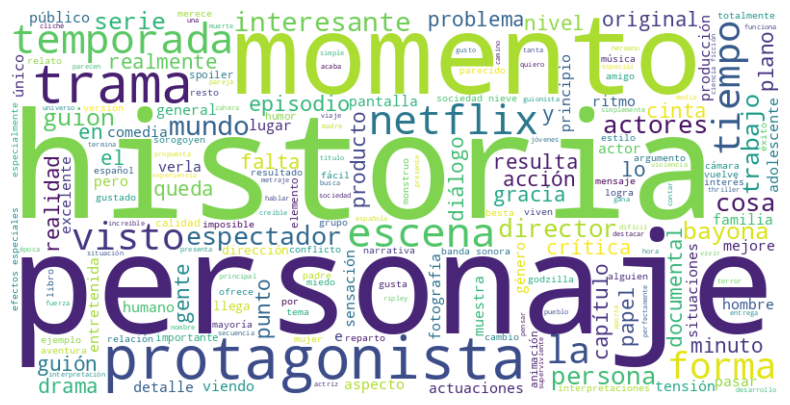

In [678]:
#Esto es necesario porque la WordCloud genera la nube de palabras a partir de
# una única cadena de texto, y no puede procesar una columna de DataFrame directamente.

text = ' '.join(reviews["Reseñas"].apply(lambda x: ' '.join(x)))

# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
# Crea un objeto WordCloud con un ancho de 800 píxeles, altura de 400, y fondo blanco.
# El método 'generate' crea la nube de palabras a partir del texto dado.

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
# Crea una figura de tamaño 10x5 pulgadas para la visualización de la nube.

plt.imshow(wordcloud, interpolation='bilinear')
# Muestra la nube de palabras en la figura, usando interpolación bilineal para suavizarla.

plt.axis('off')
# Oculta los ejes de la figura para una mejor visualización.

plt.show()
# Muestra la figura en pantalla.

# Ordenado por calificación

In [679]:
def cal(x):
    if x >= 7:
        return "Aprobado"
    elif x <= 6:
        return "Reprobado"


In [680]:
reviews["Calificación"] = reviews["review_rate"].apply(cal)

In [681]:
reviews.head()

,film_name,film_avg_rate,review_rate,review_title,review_text,Género 1,Reseñas,Calificación,Sentimiento,Subjetividad,Sentimiento 2
0,Respira (Serie de TV),4.6,1,Respira,"como fan de las series españolas y de najwa, e...",drama,"[series, españolas, najwa, duele, mala.manu, e...",Reprobado,-0.5,1.0,Negativo
1,Respira (Serie de TV),4.6,2,Esta serie te llama tonto a la cara,todo lo malo que puede tener una serie lo pose...,drama,"[posee, respira, diálogos, penosos, personajes...",Reprobado,0.0,0.0,Neutral
2,Respira (Serie de TV),4.6,1,Respira,"la serie es un drama médico que intenta ""copia...",drama,"[drama, médico, intenta, copiar, estilemas, ya...",Reprobado,-0.8,1.0,Negativo
3,Respira (Serie de TV),4.6,1,"Imposible, no hay manera",nadie te obliga a ver nada que no quieras ver ...,drama,"[obliga, quieras, dinero, público, involucrado...",Reprobado,0.0,0.0,Neutral
4,Respira (Serie de TV),4.6,1,Serie nefasta,está serie da vergüenza ajena. una serie donde...,drama,"[vergüenza, ajena, únicas, personas, trabajan,...",Reprobado,0.0,0.3,Neutral


In [682]:
reviews_pos = reviews[reviews["Calificación"]== "Aprobado"]
reviews_neg = reviews[reviews["Calificación"]== "Reprobado"]

In [683]:
reviews_pos.describe().round(0)

,film_avg_rate,review_rate,Sentimiento,Subjetividad
count,1185.0,1185.0,1185.0,1185.0
mean,7.0,8.0,0.0,0.0
std,1.0,1.0,0.0,0.0
min,3.0,7.0,-1.0,0.0
25%,6.0,7.0,0.0,0.0
50%,7.0,8.0,0.0,0.0
75%,8.0,9.0,0.0,1.0
max,8.0,10.0,1.0,1.0


In [684]:
reviews_neg.describe().round(0)

,film_avg_rate,review_rate,Sentimiento,Subjetividad
count,1375.0,1375.0,1375.0,1375.0
mean,6.0,4.0,0.0,0.0
std,1.0,2.0,0.0,0.0
min,3.0,1.0,-1.0,0.0
25%,5.0,3.0,0.0,0.0
50%,6.0,4.0,0.0,0.0
75%,6.0,6.0,0.0,1.0
max,8.0,6.0,1.0,1.0


# Nube 2

In [685]:
text2 = ' '.join(reviews_pos["Reseñas"].apply(lambda x: ' '.join(x)))
text3= ' '.join(reviews_neg["Reseñas"].apply(lambda x: ' '.join(x)))

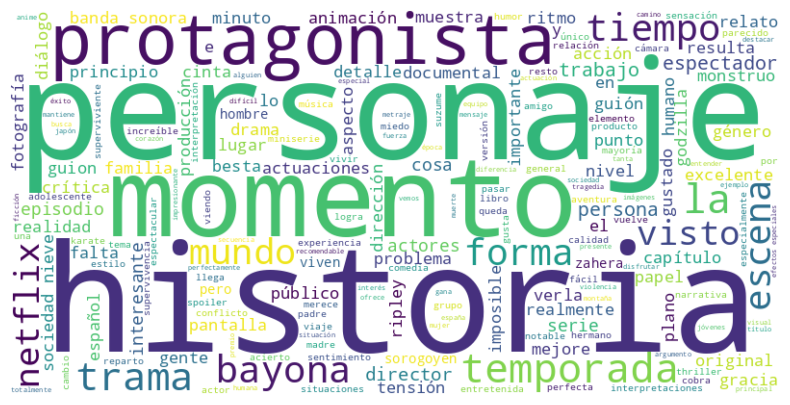

In [686]:
# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)
# Crea un objeto WordCloud con un ancho de 800 píxeles, altura de 400, y fondo blanco.
# El método 'generate' crea la nube de palabras a partir del texto dado.

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
# Crea una figura de tamaño 10x5 pulgadas para la visualización de la nube.

plt.imshow(wordcloud, interpolation='bilinear')
# Muestra la nube de palabras en la figura, usando interpolación bilineal para suavizarla.

plt.axis('off')
# Oculta los ejes de la figura para una mejor visualización.

plt.show()
# Muestra la figura en pantalla.

In [687]:
from collections import Counter

In [688]:
textos_pos = pd.Series(text2)
count_pos = Counter(' '.join(textos_pos).split()).most_common(15)

In [689]:
count_pos

[('historia', 1088),
 ('personajes', 740),
 ('momentos', 307),
 ('temporada', 303),
 ('personaje', 294),
 ('bayona', 292),
 ('forma', 281),
 ('trama', 279),
 ('momento', 279),
 ('mundo', 268),
 ('actores', 264),
 ('netflix', 261),
 ('director', 260),
 ('espectador', 256),
 ('visto', 254)]

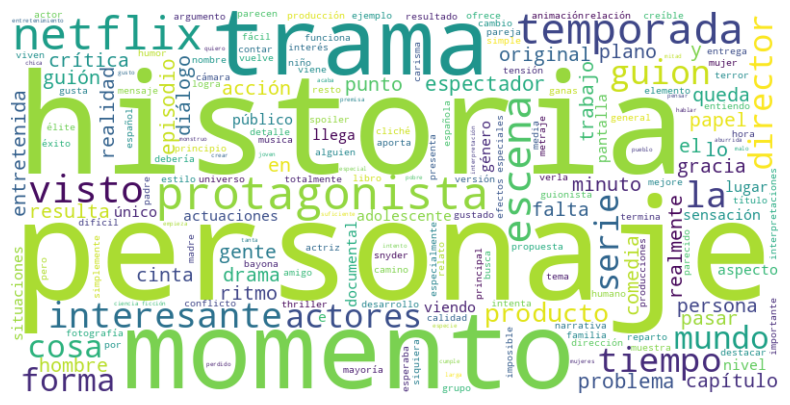

In [690]:
# Generar la WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text3)
# Crea un objeto WordCloud con un ancho de 800 píxeles, altura de 400, y fondo blanco.
# El método 'generate' crea la nube de palabras a partir del texto dado.

# Mostrar la WordCloud
plt.figure(figsize=(10, 5))
# Crea una figura de tamaño 10x5 pulgadas para la visualización de la nube.

plt.imshow(wordcloud, interpolation='bilinear')
# Muestra la nube de palabras en la figura, usando interpolación bilineal para suavizarla.

plt.axis('off')
# Oculta los ejes de la figura para una mejor visualización.

plt.show()
# Muestra la figura en pantalla.

In [691]:
textos_pos = pd.Series(text3)
count_neg = Counter(' '.join(textos_pos).split()).most_common(15)

In [692]:
count_neg

[('historia', 862),
 ('personajes', 764),
 ('netflix', 437),
 ('trama', 379),
 ('personaje', 308),
 ('temporada', 304),
 ('actores', 302),
 ('visto', 297),
 ('escenas', 286),
 ('protagonista', 275),
 ('momentos', 271),
 ('guion', 271),
 ('tiempo', 241),
 ('cosas', 234),
 ('director', 231)]

# TF-IDF

In [697]:
def clas(x):
    if x == "Aprobado":
        return 1
    else:
        return 0

In [701]:
reviews_3 = reviews.drop(["film_name", "film_avg_rate", "review_rate", "review_title", "review_text", "Género 1", "Sentimiento", "Subjetividad", "Sentimiento 2"], axis=1)
reviews_3["Calificación"] = reviews_3["Calificación"].apply(clas)
reviews_3.head()

,Reseñas,Calificación
0,"[series, españolas, najwa, duele, mala.manu, e...",0
1,"[posee, respira, diálogos, penosos, personajes...",0
2,"[drama, médico, intenta, copiar, estilemas, ya...",0
3,"[obliga, quieras, dinero, público, involucrado...",0
4,"[vergüenza, ajena, únicas, personas, trabajan,...",0


In [709]:
X= reviews_3['Reseñas']
X= X.apply(lambda x: ' '.join(x))
y= reviews_3['Calificación']


In [710]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [705]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [711]:
# Inicializar el CountVectorizer (BoW)
vectorizador_bow = CountVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_bow = vectorizador_bow.fit_transform(X_train)

In [712]:
X_train_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 144642 stored elements and shape (1792, 28088)>

In [715]:
# Transformar las reseñas de prueba
X_test_bow = vectorizador_bow.transform(X_test)
X_test_bow

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 56468 stored elements and shape (768, 28088)>

In [716]:
# Entrenar el modelo de Regresión Logística con Bag of Words
modelo_bow = LogisticRegression()
modelo_bow.fit(X_train_bow, y_train)

LogisticRegression()

In [718]:
y_pred_bow = modelo_bow.predict(X_test_bow)

In [719]:
# Calcular la precisión del modelo
accuracy_bow = accuracy_score(y_test, y_pred_bow)
print("Precisión usando Bag of Words:", accuracy_bow)

Precisión usando Bag of Words: 0.7721354166666666


In [720]:
# Inicializar el TfidfVectorizer
vectorizador_tfidf = TfidfVectorizer()

# Ajustar y transformar las reseñas de entrenamiento
X_train_tfidf = vectorizador_tfidf.fit_transform(X_train)

# Transformar las reseñas de prueba
X_test_tfidf = vectorizador_tfidf.transform(X_test)

print("Vocabulario TF-IDF:", vectorizador_tfidf.get_feature_names_out())
print("Matriz TF-IDF de entrenamiento:\n", X_train_tfidf.toarray())

Vocabulario TF-IDF: ['000' '001' '009' ... 'únicos' 'úrsula' 'útiles']
Matriz TF-IDF de entrenamiento:
 [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [721]:
# Entrenar el modelo de Regresión Logística con TF-IDF
modelo_tfidf = LogisticRegression()
modelo_tfidf.fit(X_train_tfidf, y_train)

LogisticRegression()

In [722]:
# Hacer predicciones en el conjunto de prueba
y_pred_tfidf = modelo_tfidf.predict(X_test_tfidf)

# Calcular la precisión del modelo
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
print("Precisión usando TF-IDF:", accuracy_tfidf)

Precisión usando TF-IDF: 0.79296875
